# Logistic Regression Assignment

### Predict the classification for each woman and trying to know did the woman have at least one affair.

In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score 

In [15]:
#loading the data
dta = sm.datasets.fair.load_pandas().data

In [ ]:
#add "affair" column: 1 represents having affairs, 0 represents not 
dta['affair'] = (dta.affairs > 0).astype(int)

#### Distribution of marriage ratings for those having affairs versus those not having affairs.

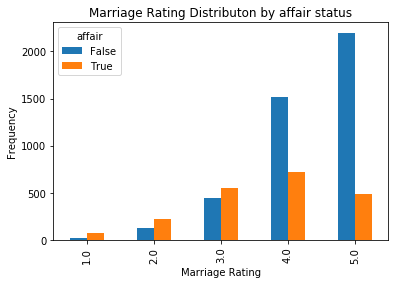

In [21]:
#barplot on marriage rating
pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distributon by affair status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency');

In [37]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
                  religious + educ + C(occupation) + C(occupation_husb)', 
                  dta, return_type="dataframe")
print(X.columns),print(y.columns)

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')
Index(['affair'], dtype='object')


(None, None)

In [23]:
X = X.rename(columns ={'C(occupation)[T.2.0]':'occ_2',
                       'C(occupation)[T.3.0]':'occ_3',
                       'C(occupation)[T.4.0]':'occ_4',
                       'C(occupation)[T.5.0]':'occ_5',
                       'C(occupation)[T.6.0]':'occ_6',
                       'C(occupation_husb)[T.2.0]':'occ_husb_2',
                       'C(occupation_husb)[T.3.0]':'occ_husb_3',
                       'C(occupation_husb)[T.4.0]':'occ_husb_4',
                       'C(occupation_husb)[T.5.0]':'occ_husb_5',
                       'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [24]:
y = np.ravel(y)

In [46]:
#instantiate a logistic regression model and fit X and y
model = LogisticRegression()
model = model.fit(X,y)
model.score(X,y)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7258875274897895

In [39]:
#Let's split the data into a training set and a testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2=LogisticRegression()
model2.fit(X_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_pred = model2.predict(X_test)
print(y_pred)

[1. 0. 0. ... 0. 0. 0.]


In [41]:
#generate evaluation metrics
print(metrics.accuracy_score(y_test, y_pred))

0.7298429319371728


The accuracy is 73%, which is the same as base data.

In [35]:
#confusion matrix and a classification report
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[1169  134]
 [ 382  225]]
              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82      1303
         1.0       0.63      0.37      0.47       607

    accuracy                           0.73      1910
   macro avg       0.69      0.63      0.64      1910
weighted avg       0.71      0.73      0.71      1910

